In [ ]:
# SPAM message classification /for fraud, spam filtering, .../

In [ ]:
# spam.csv - file containing 2 columns, spam Y/N identifier spam for spam and ham for not spam

In [ ]:
# compare TF-IDF, word2vec, doc2vec, RNN models

In [ ]:
# 1. TF IDF - for spam filter, simpliest, create sparse and large vectors, quick, 1 vector for each word

In [46]:
# Read in, clean, and vectorize data
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])

X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
messages

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is eas...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...


In [17]:
# Import Random Forest for classification from sklearn
from sklearn.ensemble import RandomForestClassifier

In [18]:
# View the arguments (and default values) for RandomForestClassifier
print(RandomForestClassifier())

RandomForestClassifier()


In [19]:
# Import the methods that will be needed to evaluate a basic model
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

In [20]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features,
                                                    messages['label'],
                                                    test_size=0.2)

In [21]:
# Fit a basic Random Forest model
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [22]:
# Make predictions on the test set using the fit model
y_pred = rf_model.predict(X_test)

In [23]:
# Evalute model predictions using precision and recall
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
print('Precision: {} / Recall: {}'.format(round(precision, 3), round(recall, 3)))

Precision: 1.0 / Recall: 0.799


In [24]:
# 2. word2vec - 2 layer network, shallow, smaller dense vectors, considers context, information loss is not possible recover

In [26]:
# Read in the data, clean it, split it into train and test sets, and then train a word2vec model
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]


messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

w2v_model = gensim.models.Word2Vec(X_train,
                                   size=100,
                                   window=5,
                                   min_count=2)

In [27]:
# Generate a list of words the word2vec model learned word vectors for
w2v_model.wv.index2word

['to',
 'you',
 'the',
 'and',
 'in',
 'is',
 'me',
 'my',
 'it',
 'for',
 'your',
 'call',
 'have',
 'of',
 'that',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'at',
 'do',
 'get',
 'if',
 'with',
 'just',
 'ur',
 'no',
 'will',
 'be',
 'this',
 'gt',
 'lt',
 'up',
 'free',
 'go',
 'how',
 'from',
 'ok',
 'what',
 'when',
 'll',
 'out',
 'all',
 'know',
 'am',
 'then',
 'good',
 'got',
 'like',
 'time',
 'come',
 'day',
 'he',
 'its',
 'was',
 'there',
 'only',
 'want',
 'text',
 'love',
 'send',
 'txt',
 'going',
 'she',
 'lor',
 'home',
 'about',
 'as',
 'need',
 'by',
 'one',
 'today',
 'don',
 'still',
 'back',
 'stop',
 'see',
 'da',
 'mobile',
 'sorry',
 'tell',
 'dont',
 'any',
 'our',
 'did',
 'later',
 'take',
 'reply',
 'week',
 'they',
 'think',
 'pls',
 'hi',
 'new',
 'dear',
 'some',
 'her',
 'ì_',
 'where',
 're',
 'please',
 'phone',
 'been',
 'night',
 'well',
 'too',
 'oh',
 'wat',
 'him',
 'hey',
 'much',
 'claim',
 'great',
 'has',
 'an',
 '

In [28]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index2word])
                     for ls in X_test])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

13 13
3 3
16 15
5 4
30 29
30 25
5 5
24 23
6 6
19 19
6 6
9 6
8 8
22 22
8 7
6 6
7 7
11 9
14 14
19 19
21 20
5 4
21 19
20 19
18 17
28 17
13 13
13 11
24 21
5 4
9 9
20 20
10 8
7 6
9 9
16 16
26 20
5 5
6 6
20 20
7 7
9 9
12 11
79 75
10 10
19 19
10 10
6 6
13 11
5 5
11 10
8 8
9 9
6 6
3 3
13 13
4 4
13 13
16 15
9 9
25 24
3 2
9 8
6 6
3 3
23 23
21 15
5 4
20 19
24 24
6 5
56 55
7 7
21 16
6 3
50 39
24 23
24 19
26 21
5 5
6 5
2 2
28 27
9 8
7 7
26 23
20 19
5 5
11 10
4 4
14 14
6 5
7 5
13 13
5 5
28 25
23 20
16 15
7 6
8 8
6 6
12 9
13 13
19 17
5 4
9 7
20 20
20 17
10 10
5 5
30 30
7 7
27 26
20 19
8 6
20 18
5 5
16 9
6 6
1 1
15 8
4 2
7 4
4 4
11 10
5 4
4 4
24 24
3 3
22 22
28 27
25 23
12 11
26 24
19 17
24 24
2 2
41 39
31 28
11 11
27 23
26 25
25 23
12 10
25 23
16 11
5 5
29 29
18 17
8 6
11 7
26 25
20 20
8 8
23 20
1 1
21 21
42 39
3 3
9 8
10 9
28 27
13 13
10 10
13 12
24 21
13 12
20 15
5 3
26 26
6 6
6 3
8 8
6 6
21 18
8 7
6 5
6 6
5 5
12 6
16 12
5 3
23 20
8 8
8 8
23 22
8 7
19 19
24 23
23 22
24 24
20 19
8 8
8 8
21 20
2 2
18

In [30]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
w2v_vect_avg = []

for vect in w2v_vect:
    if len(vect)!=0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [31]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

13 100
3 100
16 100
5 100
30 100
30 100
5 100
24 100
6 100
19 100
6 100
9 100
8 100
22 100
8 100
6 100
7 100
11 100
14 100
19 100
21 100
5 100
21 100
20 100
18 100
28 100
13 100
13 100
24 100
5 100
9 100
20 100
10 100
7 100
9 100
16 100
26 100
5 100
6 100
20 100
7 100
9 100
12 100
79 100
10 100
19 100
10 100
6 100
13 100
5 100
11 100
8 100
9 100
6 100
3 100
13 100
4 100
13 100
16 100
9 100
25 100
3 100
9 100
6 100
3 100
23 100
21 100
5 100
20 100
24 100
6 100
56 100
7 100
21 100
6 100
50 100
24 100
24 100
26 100
5 100
6 100
2 100
28 100
9 100
7 100
26 100
20 100
5 100
11 100
4 100
14 100
6 100
7 100
13 100
5 100
28 100
23 100
16 100
7 100
8 100
6 100
12 100
13 100
19 100
5 100
9 100
20 100
20 100
10 100
5 100
30 100
7 100
27 100
20 100
8 100
20 100
5 100
16 100
6 100
1 100
15 100
4 100
7 100
4 100
11 100
5 100
4 100
24 100
3 100
22 100
28 100
25 100
12 100
26 100
19 100
24 100
2 100
41 100
31 100
11 100
27 100
26 100
25 100
12 100
25 100
16 100
5 100
29 100
18 100
8 100
11 100
26 100
2

In [32]:
# 3. doc2vec - 2 layer network, smaller dense vectors, for sentence is better than word2vec

In [33]:
# Read in data, clean it, split it into train/test, and then train a doc2vec model
import gensim
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

tagged_docs_tr = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

d2v_model = gensim.models.Doc2Vec(tagged_docs_tr,
                                  vector_size=50,
                                  window=2,
                                  min_count=2)

In [34]:
# What does a document vector look like again?
d2v_model.infer_vector(['convert', 'words', 'to', 'vectors'])

array([-0.01710985,  0.01966643,  0.00182482,  0.00055429, -0.00959948,
        0.0012991 ,  0.02261367, -0.01698686, -0.01000916,  0.01348281,
        0.02088488, -0.00398539,  0.02228187,  0.00179635,  0.00104914,
        0.0075842 ,  0.00804705,  0.02231556,  0.00696488,  0.00519508,
       -0.00913341, -0.03000655,  0.02603475,  0.0133573 , -0.01959536,
        0.01189005, -0.00199725, -0.00440623,  0.01506458, -0.00402425,
       -0.0041484 ,  0.00224973,  0.00410519, -0.00934791, -0.02006061,
        0.01160818, -0.0129378 ,  0.00095816, -0.00513882,  0.00013949,
       -0.00463118, -0.00543042, -0.01385296,  0.00363927,  0.00646835,
        0.00417341, -0.00922694, -0.00313237,  0.00658163, -0.00285582],
      dtype=float32)

In [35]:
# How do we prepare these vectors to be used in a machine learning model?
vectors = [[d2v_model.infer_vector(words)] for words in X_test]

In [36]:
vectors[0]

[array([ 5.9358496e-04,  2.7013537e-03,  2.1566187e-03,  9.0293624e-03,
        -6.4064711e-03, -1.7432505e-03,  3.0339190e-03, -6.3200863e-03,
         2.5711902e-03,  3.7616992e-03, -1.7835217e-03, -6.6311820e-03,
         6.9530802e-03,  7.2417106e-03,  8.9799622e-03,  1.3177511e-02,
        -1.1937959e-07,  1.6512938e-03, -3.5343219e-03, -1.2124885e-03,
        -3.6467502e-03, -4.9162777e-03,  5.0391527e-03,  2.6901907e-03,
        -3.7428471e-03, -8.6713471e-03, -7.2485497e-03,  8.7661343e-03,
         7.3086880e-03, -5.2851322e-03, -7.0221405e-03, -7.1870484e-03,
        -8.6114620e-04,  9.8557351e-04, -2.5866036e-03,  1.9028827e-03,
         5.2057015e-04,  7.2106416e-04,  6.3787159e-03, -6.6992483e-04,
        -8.1403656e-03, -5.8405693e-03,  4.0703719e-03,  1.1476470e-02,
        -4.1126856e-03, -8.6682215e-03, -1.0907593e-02,  4.6364437e-03,
         5.7666125e-03,  1.9296285e-03], dtype=float32)]

In [37]:
# 4. RNN - more complete, dense smaller vectors, 

In [38]:
# Load the cleaned training and test sets
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import pandas as pd

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [39]:
# Train the tokenizer and use that tokenizer to convert the sentences to sequences of numbers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])

In [40]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [41]:
# Import the tools needed and use our previously defined functions to calculate precision and recall
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [42]:
# Construct our basic RNN model framework
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu')) # create fully connected dense layers
model.add(Dense(1, activation='sigmoid')) # convert models down to single prediction
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          265536    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 274,945
Trainable params: 274,945
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [44]:
# Fit the RNN, we print each epoch to receive the best score
# precision on validation (test) data is 95.14 percent
history = model.fit(X_train_seq_padded, y_train['label'], 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 7s 33ms/step - loss: 0.3048 - accuracy: 0.9015 - precision_m: 0.4337 - recall_m: 0.3319 - val_loss: 0.0781 - val_accuracy: 0.9785 - val_precision_m: 0.9569 - val_recall_m: 0.8575
Epoch 2/10
140/140 [==============================] - 4s 29ms/step - loss: 0.0413 - accuracy: 0.9883 - precision_m: 0.9711 - recall_m: 0.9340 - val_loss: 0.0550 - val_accuracy: 0.9857 - val_precision_m: 0.9457 - val_recall_m: 0.9055
Epoch 3/10
140/140 [==============================] - 5s 36ms/step - loss: 0.0120 - accuracy: 0.9969 - precision_m: 0.9751 - recall_m: 0.9574 - val_loss: 0.0615 - val_accuracy: 0.9874 - val_precision_m: 0.9714 - val_recall_m: 0.9008
Epoch 4/10
140/140 [==============================] - 4s 29ms/step - loss: 0.0043 - accuracy: 0.9993 - precision_m: 0.9857 - recall_m: 0.9807 - val_loss: 0.0613 - val_accuracy: 0.9830 - val_precision_m: 0.9243 - val_recall_m: 0.9055
Epoch 5/10
140/140 [==============================] - 4s 29ms/step -

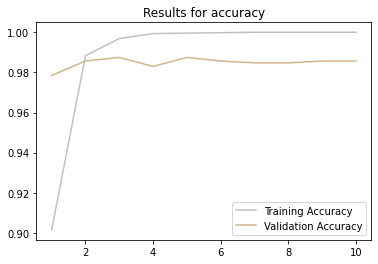

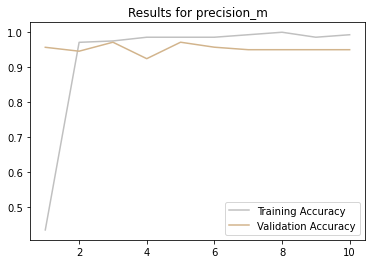

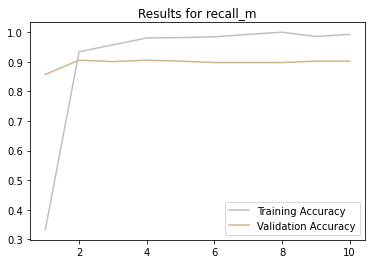

In [45]:
# plot basic evaluation metrics across epochs, see how many epochs are needed for overfitting or underfitting

import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy', color='silver')
    plt.plot(epochs, val_acc, label='Validation Accuracy',color='tan')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

In [ ]:
# compare TF-IDF, word2vec, doc2vec, RNN: precision, recall, accuracy

In [ ]:
# TF IDF:   Precision: 100., Recall: 79.6, Accuracy: 97.3
# word2vec: Precision: 59.6, Recall: 21.1, Accuracy: 87.7
# doc2vec:  Precision: 77.1, Recall: 36.7, Accuracy: 90.2
# RNN:      Precision: 95.1, Recall: 90.9, Accuracy: 98.6